# XID+PACS ELAIS-S1 Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+PACS_ELAIS-S1_20180313.fits')


In [3]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J003311.854-452559.212,8.2993897334,-45.4331144811,16.5375,37.641,4.9669,35.7054,78.6511,10.9955,6.1366,2.97714,0.30545,0.24376,0.999529,1.00004,2000.0,2000.0,0.0,0.0
HELP_J003311.199-452603.296,8.2966614384,-45.4342490173,19.7787,45.1303,5.36146,64.5017,113.157,23.7768,6.1366,2.97714,0.30545,0.24376,1.00011,1.00013,2000.0,2000.0,0.0,0.0
HELP_J003315.424-452615.143,8.31426712989,-45.4375397927,37.0218,67.9627,13.084,57.083,104.619,21.5648,6.1366,2.97714,0.30545,0.24376,0.999639,1.0003,2000.0,2000.0,0.0,0.0
HELP_J003314.599-452546.572,8.31082943334,-45.4296033101,20.7089,43.2105,6.12599,41.4091,81.1052,11.4299,6.1366,2.97714,0.30545,0.24376,0.999339,0.998972,2000.0,2000.0,0.0,0.0
HELP_J003306.225-452506.589,8.27593562562,-45.4184968362,24.6044,50.3357,7.5248,30.641,68.9784,8.07923,6.1366,2.97714,0.30545,0.24376,0.998942,0.998576,2000.0,2000.0,0.0,0.0
HELP_J003304.883-452634.388,8.27034568672,-45.4428854649,51.5526,84.8748,22.6136,66.464,127.866,20.3079,6.1366,2.97714,0.30545,0.24376,0.999517,0.99981,2000.0,2000.0,0.0,0.0
HELP_J003304.125-452627.612,8.26718894541,-45.4410033252,20.8498,46.3817,6.79294,87.9617,141.257,42.6801,6.1366,2.97714,0.30545,0.24376,0.999107,1.00148,2000.0,2000.0,0.0,0.0
HELP_J003310.155-452508.483,8.29231242172,-45.4190229197,32.2101,60.2823,11.4265,35.6171,75.4184,10.267,6.1366,2.97714,0.30545,0.24376,0.99907,1.00008,2000.0,2000.0,0.0,0.0


In [4]:
from astropy import units as u
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree

## Look at Symmetry of PDFs to determine depth level of catalogue

(0, 10)

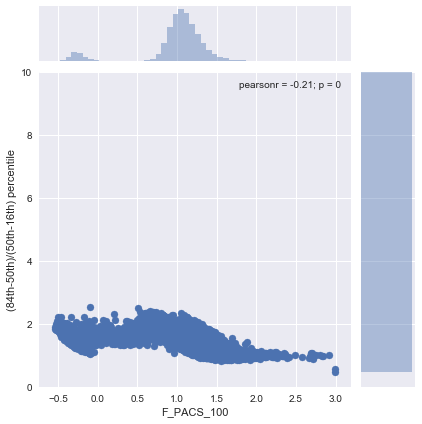

In [5]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_100']),y=skew, kind='scatter')
plt.ylim(0,10)

In [ ]:
10.0**1.3

19.952623149688797

For 100 $\mathrm{\mu m}$ depth is ~ 16mJy

(0, 10)

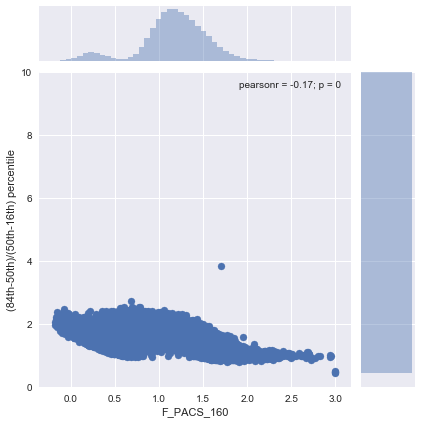

In [6]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_160']),y=skew, kind='scatter')
plt.ylim(0,10)

For 160 $\mathrm{\mu m}$ depth is ~ 30mJy

## Add flag to catalogue

In [8]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))



In [9]:
ind_100=(cat['F_PACS_100'] < 20)
ind_160=(cat['F_PACS_160'] < 30) 


In [10]:
print(ind_100.sum(),ind_160.sum(),len(cat))

169768 158225 194276


In [11]:
cat['flag_PACS_100'][ind_100]=True
cat['flag_PACS_160'][ind_160]=True


In [12]:
cat.write('./data/dmu26_XID+PACS_ELAIS-S1_cat_20180416.fits', format='fits',overwrite=True)
